Q4. a) Write a function that divides a greyscale image into equally sized non-overlapping windows and
returns the feature descriptor for each window as distribution of LBP codes. For each pixel in the
window, compare the pixel to each of its 8 neighbours. Convert the resulting bit-codes (base 2) to
decimals (base 10 numbers) and compute their histogram over the window. Normalize the histogram
(which is now a feature descriptor representing the window). Show in the report the resulting images.

Original image size (256, 256)
LBP window size (64, 64)
Total number of windows: 16


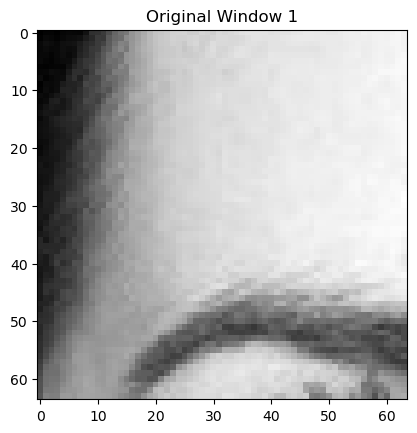

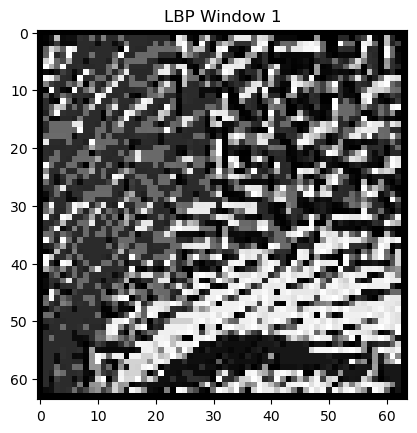

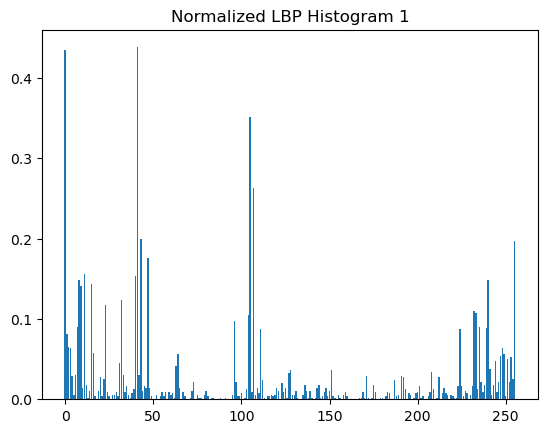

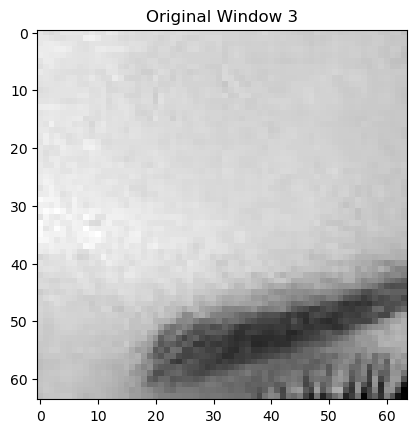

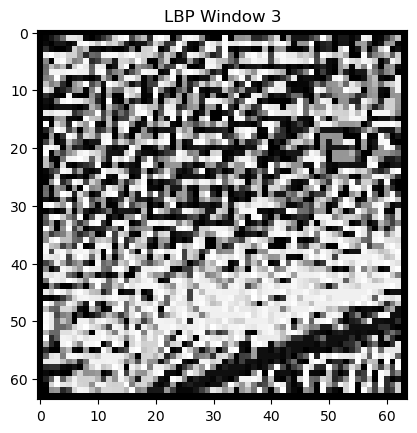

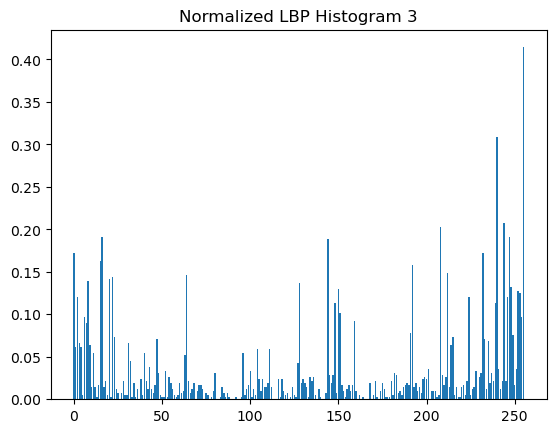

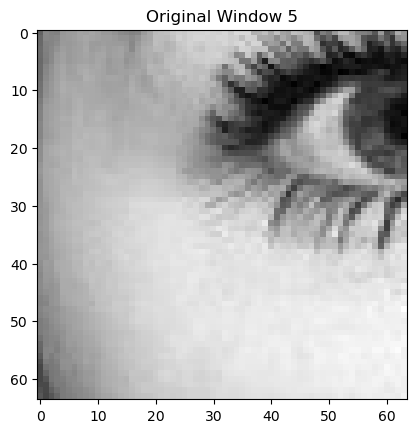

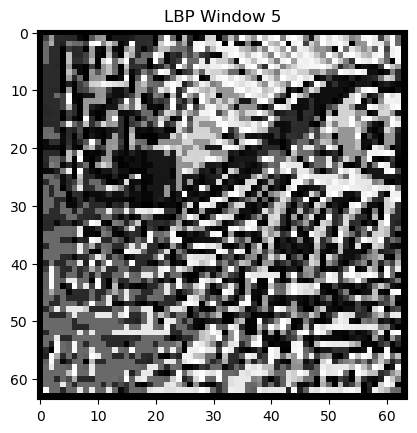

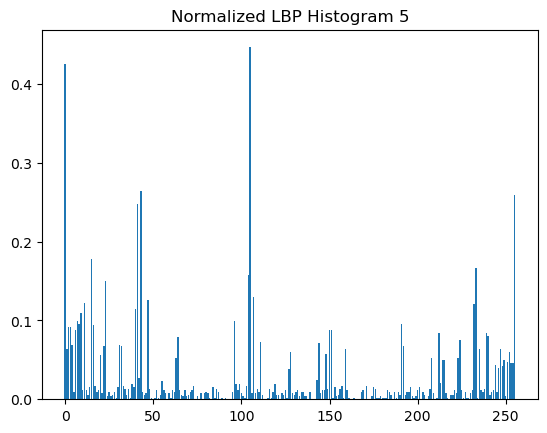

In [5]:
import numpy as np
from skimage import feature, io, color
import matplotlib.pyplot as plt

#function calculates pixel intensities based on LBP concept
def ICV_lbp(gray_image, window_size):
    
    # Step 1: we need to extract windows from the original image based on the given window_size
    window_height, window_width = window_size
    # actual image shape
    rows, cols = gray_image.shape
    #calculate total number of new windows using num_windows_vertical*num_windows_horizontal
    num_windows_vertical = rows // window_height
    num_windows_horizontal = cols // window_width

    #will calculate lbp_windows,normalized_histograms and return the results now
    original_windows = []
    normalized_histograms = []    
    lbp_windows = []
    window_count=0;
    # Step 2: now iterate over each window
    for i in range(num_windows_vertical):
        for j in range(num_windows_horizontal):
            # Step 2.1: now extract each window from the gray_image using slicing based on the current window indices.
            window = gray_image[i * window_height: (i + 1) * window_height,
                               j * window_width: (j + 1) * window_width]
            #counting total windows processed so far
            window_count=window_count+1

            # Step 3: apply LBP logic for each pixel in the window by doing below steps
            lbp_histogram = np.zeros(256, dtype=np.uint8)
            lbp_window = np.zeros_like(window, dtype=np.uint8)
            #iterate over each pixel in the window, excluding the border pixels.
            for y in range(1, window_height - 1):
                for x in range(1, window_width - 1):
                    # Step 3.2: compare pixel to neighbors
                    #center_pixel is the intensity value of the pixel at coordinates (y, x) in the current window.
                    center_pixel = window[y, x]
                    binary_values = []
                    # will iterate over a 3x3 neighborhood centered around the current pixel (y, x).
                    for dy in [-1, 0, 1]:
                        for dx in [-1, 0, 1]:
                            #ensures that the center pixel itself is not considered as a neighbor.
                            if dy == 0 and dx == 0:
                                continue
                            #get neighbor_pixel
                            neighbor_pixel = window[y + dy, x + dx]
                            #compare neighbor_pixel>center_pixel and assign binary 1 or 0
                            #binary values are appended in a clockwise order starting from the top-left neighbor and moving around the center pixel.
                            binary_values.append(1 if neighbor_pixel > center_pixel else 0)

                    # Step 4: calculate binary number
                    binary_number = ''.join(map(str, binary_values))

                    # Step 5: convert binary number to decimal
                    decimal_value = int(binary_number, 2)

                    # Step 6: increment the corresponding bin in the histogram
                    lbp_histogram[decimal_value] += 1

                    # Step 7: save LBP-encoded window for display
                    lbp_window[y, x] = decimal_value
                    
             # The below code was kept for my testing to view few windows, for now limit =0 so it won't dispaly
            #if you want to display some windows please change limit to any number of window count
            limit=0
            if window_count <=limit:
                plt.imshow(window, cmap='gray')
                plt.title(f"Window {i},{j}")
                #plt.savefig(f"window_{i}_{j}.png")
                plt.show()
            
            # Step 3.1: Display LBP-encoded window
            if window_count <= limit:
                plt.imshow(lbp_window, cmap='gray')
                plt.title(f"LBP of Window {i},{j}")
                #plt.savefig(f"lbp_{i}_{j}.png")
                plt.show()
            # Step display histogram
            if window_count<=limit:
                plt.bar(range(256), lbp_histogram)
                plt.title(f"Histogram of LBP for Window {i},{j}")
                #plt.savefig(f"histogram_{i}_{j}.png")
                plt.show()

            #Step 8: Normalize histogram using division by sum concept
            #normalized_histogram = lbp_histogram / np.sum(lbp_histogram)
            #normalized_histograms.append(normalized_histogram)
            # Step 8: Normalize histogram using L2 normalization
            l2_norm = np.linalg.norm(lbp_histogram)
            epsilon = 1e-10  # Small epsilon value to avoid division by zero
            normalized_histogram = lbp_histogram / (l2_norm + epsilon)
            #normalized_histogram = lbp_histogram / l2_norm
            normalized_histograms.append(normalized_histogram)
            # save original window and LBP window
            original_windows.append(window)
            lbp_windows.append(lbp_window)

    return normalized_histograms,original_windows, lbp_windows,window_count

# use face-2.jpg as grayscale image
gray_image = io.imread('face-2.jpg', as_gray=True)

# define window size, which can be changed for each run, like (4,4), (8,8),(16,16),(32,32),(64,64), 
window_size = (64, 64)
#actual image size
print("Original image size {}".format(gray_image.shape))
print("LBP window size {}".format(window_size))

# apply naive LBP on this image
normalized_lbp_histograms,original_windows, lbp_windows, total_windows = ICV_lbp(gray_image, window_size)

print(f"Total number of windows: {total_windows}")

'''

# Display the first few LBP windows and histograms
num_windows_to_display = 3

for i in range(min(num_windows_to_display, len(normalized_lbp_histograms))):
    plt.subplot(3, num_windows_to_display, i + 1)
    plt.imshow(original_windows[i], cmap='gray', interpolation='nearest')
    plt.title(f"Original Window {i + 1}")

    plt.subplot(3, num_windows_to_display, num_windows_to_display + i + 1)
    plt.imshow(lbp_windows[i], cmap='gray', interpolation='nearest')
    plt.title(f"LBP Window {i + 1}")

    plt.subplot(3, num_windows_to_display, 2 * num_windows_to_display + i + 1)
    plt.bar(range(256), normalized_lbp_histograms[i])
    plt.title(f"Normalized LBP Histogram {i + 1}")

plt.show()


# Display the first few original windows
num_windows_to_display = 5

for i in range(min(num_windows_to_display, len(original_windows))):
    plt.subplot(1, num_windows_to_display, i + 1)
    plt.imshow(original_windows[i], cmap='gray', interpolation='nearest')
    plt.title(f"Original Window {i + 1}")

plt.show()

'''

# specify the indices of the windows you want to save
windows_to_save = [0, 2, 4]
'''
# Save the specified windows, LBP windows, and normalized histograms
for i, window_index in enumerate(windows_to_save):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original_windows[window_index], cmap='gray', interpolation='nearest')
    plt.title(f"Original Window {window_index + 1}")
    plt.savefig(f"q4_Original_Window_{window_index}.jpg")
    
    plt.subplot(1, 3, 2)
    plt.imshow(lbp_windows[window_index], cmap='gray', interpolation='nearest')
    plt.title(f"LBP Window {window_index + 1}")
    plt.savefig(f"q4_LBP_Window_{window_index}.jpg")

    plt.subplot(1, 3, 3)
    plt.bar(range(256), normalized_lbp_histograms[window_index])
    plt.title(f"Normalized LBP Histogram {window_index + 1}")
    plt.savefig(f"q4_Normalized_LBP_Histogram_window_{window_index}.jpg")

'''
# Save the specified windows, LBP windows, and normalized histograms
for i, window_index in enumerate(windows_to_save):
    # Save Original Window
    plt.imshow(original_windows[window_index], cmap='gray', interpolation='nearest')
    plt.title(f"Original Window {window_index + 1}")
    plt.savefig(f"q4_Original_Window_{window_index}.jpg")
    plt.show()  # Clear the figure for the next plot

    # Save LBP Window
    plt.imshow(lbp_windows[window_index], cmap='gray', interpolation='nearest')
    plt.title(f"LBP Window {window_index + 1}")
    plt.savefig(f"q4_LBP_Window_{window_index}.jpg")
    plt.show()  # Clear the figure for the next plot

    # Save Normalized LBP Histogram
    plt.bar(range(256), normalized_lbp_histograms[window_index])
    plt.title(f"Normalized LBP Histogram {window_index + 1}")
    plt.savefig(f"q4_Normalized_LBP_Histogram_window_{window_index}.jpg")
    plt.show()  # Clear the figure for the next plot



b) Come up with a descriptor that represents the whole image as consisting of multiple windows. For
example, you could combine several local descriptions into a global description by concatenation.
Discuss in the report alternative approaches. Using the global descriptor you created, implement a
classification process that separates the images in the dataset into two categories: face images and
non-face images (for example, you could use histogram similarities). Comment the results in the
report. Is the global descriptor able to represent whole images of different types (e.g. faces vs. cars)?
Identify problems (if any), discuss them in the report and suggest possible solutions

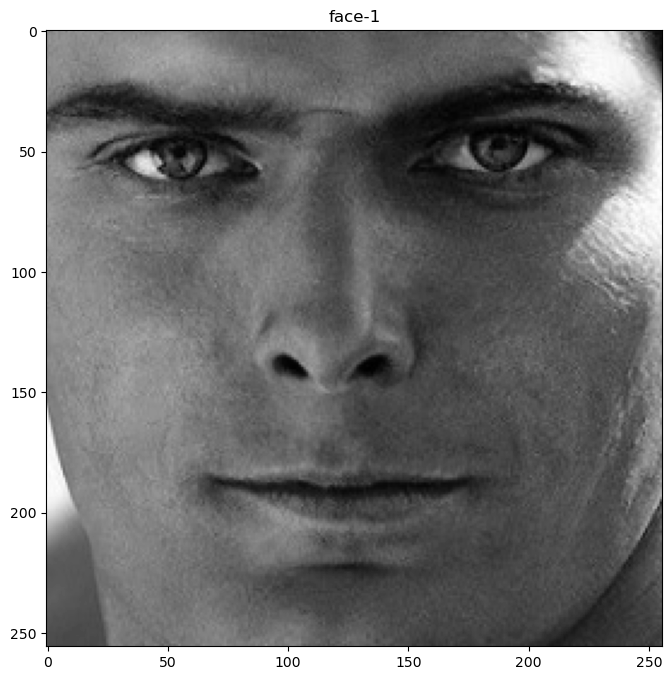

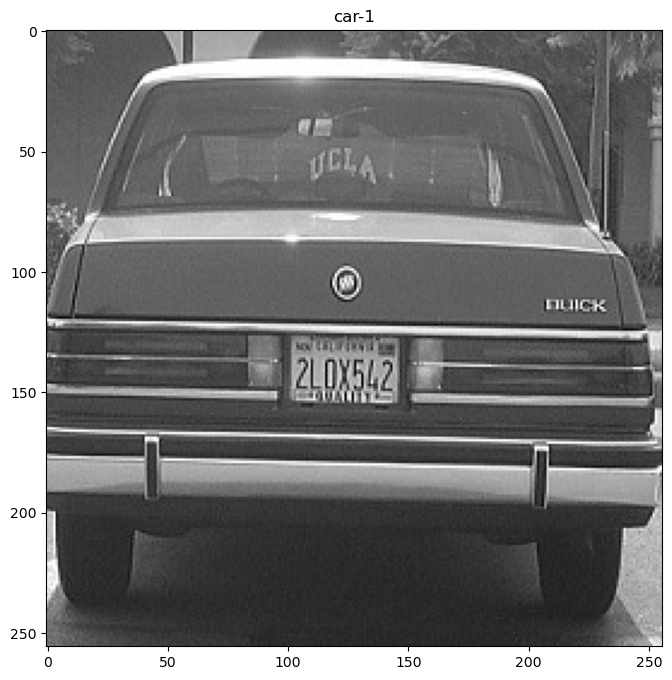

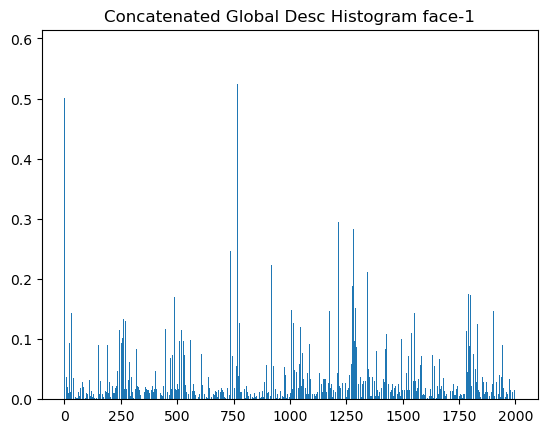

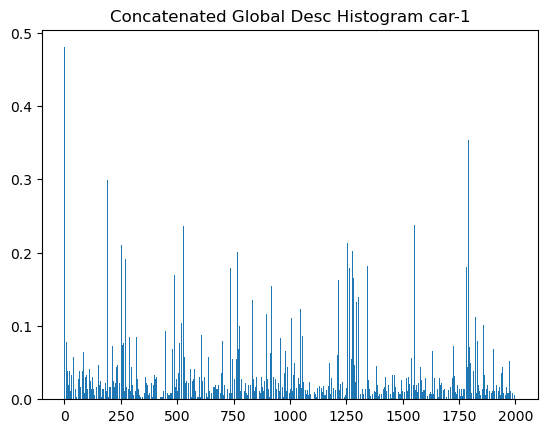

LBP window size (64, 64)
------------------------
similarity_face is 1.0000000000000033
similarity_non_face is 0.7105499081549541
Given face-1.jpg is: detected as Face
------------------------
similarity_face is 0.7636924769197343
similarity_non_face is 0.6615230493440378
Given face-2.jpg is: detected as Face
------------------------
similarity_face is 0.8760252225048852
similarity_non_face is 0.7095223462780211
Given face-3.jpg is: detected as Face
------------------------
similarity_face is 0.7105499081549541
similarity_non_face is 1.0000000000000004
Given car-1.jpg is: detected as Non-Face
------------------------
similarity_face is 0.7805440862677695
similarity_non_face is 0.8943382984288499
Given car-2.jpg is: detected as Non-Face
------------------------
similarity_face is 0.7593658076344256
similarity_non_face is 0.9119924758336189
Given car-3.jpg is: detected as Non-Face


In [6]:
import numpy as np
from skimage import io
from sklearn.metrics.pairwise import cosine_similarity

# define LBP window size, which can be changed for each run, like (4,4), (8,8),(16,16),(32,32),(64,64), 
window_size = (64, 64)

#function combine lbp local descriptions into a global description by concatenation.
def ICV_global_descriptor(gray_image, window_size):
    normalized_histograms, _, _,_ = ICV_lbp(gray_image, window_size)
    return np.concatenate(normalized_histograms)

def ICV_plot_and_save_histogram(descriptor, name, num_bins=256):
    # plot the concatenated global histogram
    subset_length = 2000  # histogram plotting for complete is taking time , hence use subplot
    plt.bar(range(subset_length), descriptor[:subset_length])
    plt.title(f"Concatenated Global Desc Histogram {name}")
    plt.savefig(f"q4_Global_Desc_Histogram_{name}.jpg")
    plt.show()


# reading face and car images
face1 = io.imread('face-1.jpg', as_gray=True)
car1 = io.imread('car-1.jpg', as_gray=True)

# Display the original images for face-1 and car-1
plt.figure(figsize=(10, 8))
plt.imshow(face1, cmap='gray')
plt.title('face-1')
plt.savefig(f"q4_face1_gray.jpg")
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(car1, cmap='gray')
plt.title('car-1')
plt.savefig(f"q4_car1_gray.jpg")
plt.show()

# Calculate and display  global descriptors for face-1 and car-1
global_desc_f1 = ICV_global_descriptor(face1, window_size)
global_desc_c1 = ICV_global_descriptor(car1, window_size)
ICV_plot_and_save_histogram(global_desc_f1,'face-1')
ICV_plot_and_save_histogram(global_desc_c1,'car-1')


#function computes similarity for two global desc using sklearn.metrics.pairwise import cosine_similarity
def ICV_calculate_cosine_similarity(descriptor1, descriptor2):
    return cosine_similarity(descriptor1.reshape(1, -1), descriptor2.reshape(1, -1))[0, 0]

#function identifies face vs non face based on the similarity and classifies images 
def ICV_classify_images(input_global_descriptor,face_descriptor, non_face_descriptor):
    #calculates cosine_similarity of input_global_descriptor w.r.t face_descriptor
    similarity_face = ICV_calculate_cosine_similarity(input_global_descriptor, face_descriptor)
    print("similarity_face is {}".format(similarity_face))
    #calculates cosine_similarity of input_global_descriptor w.r.t non_face_descriptor
    similarity_non_face = ICV_calculate_cosine_similarity(input_global_descriptor, non_face_descriptor)
    print("similarity_non_face is {}".format(similarity_non_face))
    #print("Difference is {}".format(abs(similarity_face-similarity_non_face)))
    #checks if the input_global_descriptor has more similarity with face or not
    if similarity_face > similarity_non_face:
        return "detected as Face"
    else:
        return "detected as Non-Face"


print("LBP window size {}".format(window_size))

#  all face and car images 
image_filenames = ['face-1.jpg', 'face-2.jpg', 'face-3.jpg', 'car-1.jpg', 'car-2.jpg', 'car-3.jpg']

for image_filename in image_filenames:
    
    image = io.imread(image_filename, as_gray=True)

    # Calculate and display the global descriptor
    global_descriptor = ICV_global_descriptor(image, window_size)
    #ICV_plot_and_save_histogram(global_descriptor, image_filename)
    print("------------------------")
    # Classify the image based on the global descriptor
    result = ICV_classify_images(global_descriptor, global_desc_f1, global_desc_c1)
    print(f"Given {image_filename} is: {result}")


c) Decrease the window size and perform classification again. Comment the results in the report.


In [7]:
import numpy as np
from skimage import io
from sklearn.metrics.pairwise import cosine_similarity

# define LBP window size, which can be changed for each run, like (4,4), (8,8),(16,16),(32,32),(64,64), 
window_size = (4, 4)

#function combine lbp local descriptions into a global description by concatenation.
def ICV_global_descriptor(gray_image, window_size):
    normalized_histograms, _, _,_ = ICV_lbp(gray_image, window_size)
    return np.concatenate(normalized_histograms)

def ICV_plot_and_save_histogram(descriptor, name, num_bins=256):
    # plot the concatenated global histogram
    subset_length = 2000  # histogram plotting for complete is taking time , hence use subplot
    plt.bar(range(subset_length), descriptor[:subset_length])
    plt.title(f"Concatenated Global Desc Histogram {name}")
    plt.savefig(f"q4_Global_Desc_Histogram_{name}.jpg")
    plt.show()


# reading face and car images
face1 = io.imread('face-1.jpg', as_gray=True)
car1 = io.imread('car-1.jpg', as_gray=True)


# Calculate and display  global descriptors for face-1 and car-1
global_desc_f1 = ICV_global_descriptor(face1, window_size)
global_desc_c1 = ICV_global_descriptor(car1, window_size)


#function computes similarity for two global desc using sklearn.metrics.pairwise import cosine_similarity
def ICV_calculate_cosine_similarity(descriptor1, descriptor2):
    return cosine_similarity(descriptor1.reshape(1, -1), descriptor2.reshape(1, -1))[0, 0]

#function identifies face vs non face based on the similarity and classifies images 
def ICV_classify_images(input_global_descriptor,face_descriptor, non_face_descriptor):
    #calculates cosine_similarity of input_global_descriptor w.r.t face_descriptor
    similarity_face = ICV_calculate_cosine_similarity(input_global_descriptor, face_descriptor)
    print("similarity_face is {}".format(similarity_face))
    #calculates cosine_similarity of input_global_descriptor w.r.t non_face_descriptor
    similarity_non_face = ICV_calculate_cosine_similarity(input_global_descriptor, non_face_descriptor)
    print("similarity_non_face is {}".format(similarity_non_face))
    #print("Difference is {}".format(abs(similarity_face-similarity_non_face)))
    #checks if the input_global_descriptor has more similarity with face or not
    if similarity_face > similarity_non_face:
        return "detected as Face"
    else:
        return "detected as Non-Face"

print("LBP window size {}".format(window_size))


#  all face and car images 
image_filenames = ['face-1.jpg', 'face-2.jpg', 'face-3.jpg', 'car-1.jpg', 'car-2.jpg', 'car-3.jpg']

for image_filename in image_filenames:
    
    image = io.imread(image_filename, as_gray=True)

    # Calculate and display the global descriptor
    global_descriptor = ICV_global_descriptor(image, window_size)
    #ICV_plot_and_save_histogram(global_descriptor, image_filename)
    print("------------------------")
    # Classify the image based on the global descriptor
    result = ICV_classify_images(global_descriptor, global_desc_f1, global_desc_c1)
    print(f"Given {image_filename} is: {result}")


LBP window size (4, 4)
------------------------
similarity_face is 1.0000000000000009
similarity_non_face is 0.06911515073328679
Given face-1.jpg is: detected as Face
------------------------
similarity_face is 0.051302679940201414
similarity_non_face is 0.05846457434523675
Given face-2.jpg is: detected as Non-Face
------------------------
similarity_face is 0.06574755354655898
similarity_non_face is 0.06735202375405261
Given face-3.jpg is: detected as Non-Face
------------------------
similarity_face is 0.06911515073328679
similarity_non_face is 1.0000000000000016
Given car-1.jpg is: detected as Non-Face
------------------------
similarity_face is 0.06649944415575439
similarity_non_face is 0.0847929716520832
Given car-2.jpg is: detected as Non-Face
------------------------
similarity_face is 0.06734488259598961
similarity_non_face is 0.08054977858029054
Given car-3.jpg is: detected as Non-Face


d) Increase the window size and perform classification again. Comment the results in the report.


In [8]:
import numpy as np
from skimage import io
from sklearn.metrics.pairwise import cosine_similarity

# define LBP window size, which can be changed for each run, like (4,4), (8,8),(16,16),(32,32),(64,64), 
window_size = (128, 128)
print("LBP window size {}".format(window_size))

#function combine lbp local descriptions into a global description by concatenation.
def ICV_global_descriptor(gray_image, window_size):
    normalized_histograms, _, _,_ = ICV_lbp(gray_image, window_size)
    return np.concatenate(normalized_histograms)

def ICV_plot_and_save_histogram(descriptor, name, num_bins=256):
    # plot the concatenated global histogram
    subset_length = 2000  # histogram plotting for complete is taking time , hence use subplot
    plt.bar(range(subset_length), descriptor[:subset_length])
    plt.title(f"Concatenated Global Desc Histogram {name}")
    plt.savefig(f"q4_Global_Desc_Histogram_{name}.jpg")
    plt.show()


# reading face and car images
face1 = io.imread('face-1.jpg', as_gray=True)
car1 = io.imread('car-1.jpg', as_gray=True)


# Calculate and display  global descriptors for face-1 and car-1
global_desc_f1 = ICV_global_descriptor(face1, window_size)
global_desc_c1 = ICV_global_descriptor(car1, window_size)


#function computes similarity for two global desc using sklearn.metrics.pairwise import cosine_similarity
def ICV_calculate_cosine_similarity(descriptor1, descriptor2):
    return cosine_similarity(descriptor1.reshape(1, -1), descriptor2.reshape(1, -1))[0, 0]

#function identifies face vs non face based on the similarity and classifies images 
def ICV_classify_images(input_global_descriptor,face_descriptor, non_face_descriptor):
    #calculates cosine_similarity of input_global_descriptor w.r.t face_descriptor
    similarity_face = ICV_calculate_cosine_similarity(input_global_descriptor, face_descriptor)
    print("similarity_face is {}".format(similarity_face))
    #calculates cosine_similarity of input_global_descriptor w.r.t non_face_descriptor
    similarity_non_face = ICV_calculate_cosine_similarity(input_global_descriptor, non_face_descriptor)
    print("similarity_non_face is {}".format(similarity_non_face))
    #print("Difference is {}".format(abs(similarity_face-similarity_non_face)))
    #checks if the input_global_descriptor has more similarity with face or not
    if similarity_face > similarity_non_face:
        return "detected as Face"
    else:
        return "detected as Non-Face"



#  all face and car images 
image_filenames = ['face-1.jpg', 'face-2.jpg', 'face-3.jpg', 'car-1.jpg', 'car-2.jpg', 'car-3.jpg']

for image_filename in image_filenames:
    
    image = io.imread(image_filename, as_gray=True)

    # Calculate and display the global descriptor
    global_descriptor = ICV_global_descriptor(image, window_size)
    #ICV_plot_and_save_histogram(global_descriptor, image_filename)
    print("------------------------")
    # Classify the image based on the global descriptor
    result = ICV_classify_images(global_descriptor, global_desc_f1, global_desc_c1)
    print(f"Given {image_filename} is: {result}")


LBP window size (128, 128)
------------------------
similarity_face is 0.9999999999999986
similarity_non_face is 0.8347487357502679
Given face-1.jpg is: detected as Face
------------------------
similarity_face is 0.8541791004985178
similarity_non_face is 0.7619526534643426
Given face-2.jpg is: detected as Face
------------------------
similarity_face is 0.9005989529396183
similarity_non_face is 0.7799764991989505
Given face-3.jpg is: detected as Face
------------------------
similarity_face is 0.8347487357502679
similarity_non_face is 1.0
Given car-1.jpg is: detected as Non-Face
------------------------
similarity_face is 0.858030427126572
similarity_non_face is 0.8559945115002743
Given car-2.jpg is: detected as Face
------------------------
similarity_face is 0.8236116306117378
similarity_non_face is 0.8516188160721101
Given car-3.jpg is: detected as Non-Face
